# Grid World

In [1]:
import random
from tqdm import tqdm
import pandas as pd
import numpy as np

In [2]:
#---- 파라메터를 설정 ----#

width = 12    # Grid width
height = 21    # Grid height
alpha = .99   # 학습률
n_epoch = 5000
penalty = 1    # 각 step 마다 받는 penalty
gamma = .99    # 할인율
traps = [[width//3, height//3], [2*width//3, 2*height//3]]

In [3]:
class GridWorld():

    def __init__(self,width, height):
        self.x = 0
        self.y = 0
        self.width = width
        self.height = height
        self.history = []

    #-----------위 아래 움직이는거----------#
    
    def right(self):
        if self.x==self.width-1:
            self.x = self.width-1
        else:
            self.x +=1

    def left(self):
        if self.x==0:
            self.x = 0
        else:
            self.x -=1

    def up(self):
        if self.y==0:
            self.y = 0
        else:
            self.y -=1

    def down(self):
        if self.y==self.height-1:
            self.y = self.height-1
        else:
            self.y +=1
    #----------Random하게 움직이는거-------#

    def move_randomly(self):
        rand_num = random.randint(0,3)   # 난수 발생
        if rand_num==0:
            self.right()    # 난수 0 -> 오른쪽으로
            self.history.append([self.x,self.y])
        elif rand_num==1: 
            self.left()         # 난수 1 -> 왼쪽으로
            self.history.append([self.x,self.y])
        elif rand_num==2: 
            self.up()           # 난수 2 -> 위로
            self.history.append([self.x,self.y])
        else:
            self.down()         # 난수 3 -> 아래로
        self.history.append([self.x,self.y])

    # --------Start -> End 갈 때까지 움직이기(에피소드 생성)----#

    def make_episode(self):
        while True: # End 올 때까지 무한 루프
            self.move_randomly()
            if self.x==self.width-1 and self.y==self.height-1:
                break

    #--------초기화 (x,y 좌료 0)
    def initialize(self):
        self.x = 0
        self.y = 0
        self.history = []

In [4]:
env = GridWorld(width = width, height = height)

# Intialize V table
V_table = np.zeros((height, width))

### MC algorithm

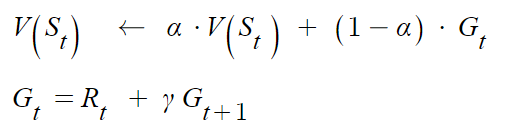

In [5]:
for _ in tqdm(range(n_epoch)):
    env.make_episode() 
    history = env.history
    cum_reward = 0

    for position in history[::-1]:
        if position in traps:
            reward = -2 * penalty
        else:
            reward = - penalty
        
        x, y = position            
        V_table[y, x] = V_table[y, x]*alpha + cum_reward*(1-alpha)
        cum_reward = reward + cum_reward*gamma 
    
    env.initialize()

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:33<00:00, 148.81it/s]


In [6]:
# Print Result
df = pd.DataFrame(V_table)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,-100.063811,-99.788390,-99.836555,-100.002956,-100.279257,-100.246162,-100.161211,-100.109936,-99.976429,-99.978348,-100.127995,-100.144144
1,-100.315238,-100.194369,-99.943431,-100.004644,-100.247411,-100.265282,-100.310618,-100.181530,-100.016818,-99.980252,-100.021620,-99.977225
2,-100.365518,-100.336065,-100.259277,-100.003785,-100.079967,-100.240205,-100.204422,-100.136760,-99.948011,-99.936791,-100.066762,-100.121608
3,-100.484849,-100.496410,-100.375967,-100.349736,-100.360706,-100.350143,-100.272703,-100.219251,-99.908989,-99.675645,-100.024087,-99.837096
4,-100.426547,-100.475018,-100.497260,-100.692111,-100.522941,-100.392858,-100.330332,-100.453071,-100.227567,-99.762845,-99.740851,-100.240336
5,-100.330468,-100.507166,-100.052062,-100.329374,-100.489609,-100.459477,-100.201646,-100.267900,-100.282303,-99.741575,-99.356079,-99.632292
6,-100.169155,-100.182339,-100.289653,-101.020758,-101.123329,-100.640488,-100.562385,-100.321225,-100.351331,-99.843857,-99.646038,-99.815783
7,-100.454539,-100.793142,-101.309100,-102.237612,-101.794833,-101.006745,-101.113737,-100.826642,-100.262880,-99.389201,-99.903858,-99.110299
8,-100.368137,-100.632715,-100.784785,-101.299138,-101.720376,-101.101695,-101.159097,-100.872439,-100.513832,-99.681529,-99.437680,-99.262552
9,-100.213659,-99.915500,-100.139654,-100.653093,-100.937452,-100.723926,-100.607370,-100.893243,-100.939499,-99.912303,-99.122903,-98.599581


### Find Path

In [7]:
# Improved Example

def step(start):
    x, y = start
    dummy = []
    for next_step in [(x+1, y), (x, y+1)]:
        nx, ny = next_step
        if 0<=nx and nx<width and 0<=ny and ny<height:
            dummy.append((V_table[ny, nx], [nx, ny]))
    dummy.sort()
    return dummy[-1][1]

In [8]:
position, cnt= [0,0], 0

while position != [width-1, height-1]:
    print(f'{cnt} step : x : {position[0]}, y : {position[1]}')
    position = step(position)
    cnt+=1
print(f'{cnt} step : x : {position[0]}, y : {position[1]}')

0 step : x : 0, y : 0
1 step : x : 1, y : 0
2 step : x : 2, y : 0
3 step : x : 2, y : 1
4 step : x : 3, y : 1
5 step : x : 3, y : 2
6 step : x : 4, y : 2
7 step : x : 5, y : 2
8 step : x : 6, y : 2
9 step : x : 7, y : 2
10 step : x : 8, y : 2
11 step : x : 8, y : 3
12 step : x : 9, y : 3
13 step : x : 9, y : 4
14 step : x : 10, y : 4
15 step : x : 10, y : 5
16 step : x : 11, y : 5
17 step : x : 11, y : 6
18 step : x : 11, y : 7
19 step : x : 11, y : 8
20 step : x : 11, y : 9
21 step : x : 11, y : 10
22 step : x : 11, y : 11
23 step : x : 11, y : 12
24 step : x : 11, y : 13
25 step : x : 11, y : 14
26 step : x : 11, y : 15
27 step : x : 11, y : 16
28 step : x : 11, y : 17
29 step : x : 11, y : 18
30 step : x : 11, y : 19
31 step : x : 11, y : 20
